# Cassave - Cassava Leaf Disease Classification
Se usará un dataset equivalente a la unión de los dos siguientes datasets:
- [Cassava Leaf Disease Classification](https://www.kaggle.com/c/cassava-leaf-disease-classification)
- [Cassava Disease Classification (*iCassava*)
](https://www.kaggle.com/srg9000/cassava-plant-disease-merged-20192020)


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import random
from pathlib import Path
import requests
import sys
from torch.utils.data import WeightedRandomSampler

## Cargamos Datos


In [4]:
path = Path("cassava-leaf-disease-merged")

In [5]:
os.listdir(path)

['merged.csv', 'train']

In [6]:
merged_ds_df = pd.read_csv(path/"merged.csv")
merged_ds_df

,image_id,label,source
0,1000015157.jpg,0,2020
1,1000201771.jpg,3,2020
2,100042118.jpg,1,2020
3,1000723321.jpg,1,2020
4,1000812911.jpg,3,2020
...,...,...,...
26332,train-cbb-114.jpg,0,2019
26333,train-cmd-661.jpg,3,2019
26334,train-cmd-1716.jpg,3,2019
26335,train-healthy-236.jpg,4,2019


## Exploración de Datos
El dataset posee 5 clases:


```json
{
  "0": "Cassava Bacterial Blight (CBB)",
  "1": "Cassava Brown Streak Disease (CBSD)",
  "2": "Cassava Green Mottle (CGM)",
  "3": "Cassava Mosaic Disease (CMD)",
  "4": "Healthy"
}
```




In [7]:
map2label = {
  "0": "CBB",
  "1": "CBSD",
  "2": "CGM",
  "3": "CMD",
  "4": "Healthy"
}

In [8]:
merged_ds_df["label_name"] = [map2label[str(label)] for label in merged_ds_df["label"]]

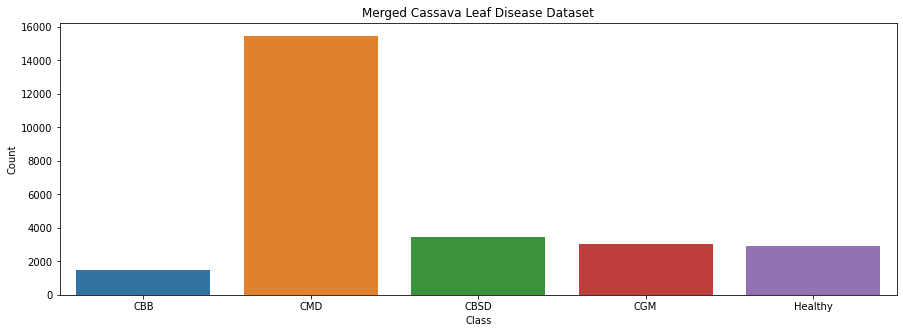

In [9]:
plt.figure(figsize=(15, 5))
sns.countplot(x="label_name", data=merged_ds_df);
plt.title("Merged Cassava Leaf Disease Dataset");
plt.xlabel("Class");
plt.ylabel("Count");

In [10]:
merged_ds_df["label"].value_counts()

3    15462
1     3476
2     3017
4     2890
0     1492
Name: label, dtype: int64

## Pytorch DataModule

In [12]:
from src import DataModule

size=512

config = {
    "subset": 0.,
    "sampler": True,
    "test_size": 0.2,
    "batch_size": 256,
    "train_trans": {
      'PadIfNeeded': {
          'min_height': size, 
          'min_width': size,
          'border_mode': 0 
      },
      'RandomCrop': {
          'height': size, 
          'width': size,
      }, 
      "HorizontalFlip": {},
      "VerticalFlip": {},
      "RandomBrightnessContrast": {},
      "MotionBlur": {},
      "RandomContrast": {},
      "Cutout": {
          "max_h_size": 16,
          "max_w_size": 16,
      }

    },
    "val_trans": {
      'PadIfNeeded': {
          'min_height': size, 
          'min_width': size,
          'border_mode': 0 
      },
      'RandomCrop': {
          'height': size, 
          'width': size,
      } 
    },
}

dm = DataModule(**config)

dm.setup()


Ejemplos de entrenamiento:  21069
Ejemplos de validacion:  5268


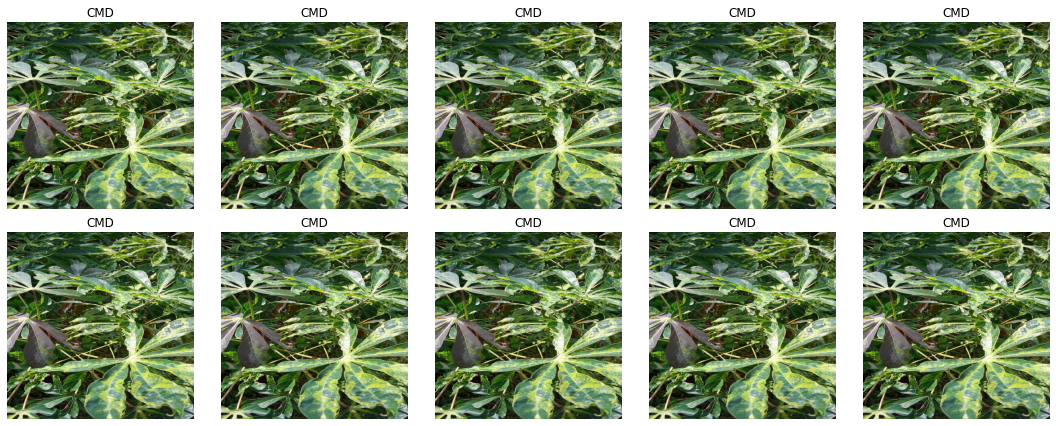

In [13]:
r, c = 2, 5
fig = plt.figure(figsize=(3*c, 3*r))
ds = dm.train_ds
ix = random.randint(0, len(ds))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        img, label = ds[ix]
        plt.axis("off")
        plt.imshow(img.permute(1,2,0))
        plt.title(map2label[str(label.item())])
plt.tight_layout()
plt.show()

In [14]:
img.shape, img.dtype, img.max(), img.min()

(torch.Size([3, 512, 512]), torch.float32, tensor(1.), tensor(0.))

In [15]:
loader = dm.train_dataloader()
imgs , labels = next(iter(loader))
pd.DataFrame(data=[label.item() for label in labels]).value_counts()

3    57
4    56
0    52
2    46
1    45
dtype: int64